<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [2]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib.pyplot as plt

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [3]:
import csv
sat_list = []
with open('./sat_scores.csv', 'rU') as f:
    reader = csv.reader(f)
    for row in reader:
        sat_list.append(row)
f.close()

print sat_list[0]
print sat_list[1:11]

['State', 'Rate', 'Verbal', 'Math']
[['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515'], ['NY', '77', '495', '505'], ['NH', '72', '520', '516'], ['RI', '71', '501', '499'], ['PA', '71', '500', '499'], ['VT', '69', '511', '506'], ['ME', '69', '506', '500'], ['VA', '68', '510', '501']]


In [4]:
from pprint import pprint

sat_dict = {x[0]:x[1:] for x in sat_list}
pprint(sat_dict)

{'AK': ['51', '514', '510'],
 'AL': ['9', '559', '554'],
 'AR': ['6', '562', '550'],
 'AZ': ['34', '523', '525'],
 'All': ['45', '506', '514'],
 'CA': ['51', '498', '517'],
 'CO': ['31', '539', '542'],
 'CT': ['82', '509', '510'],
 'DC': ['56', '482', '474'],
 'DE': ['67', '501', '499'],
 'FL': ['54', '498', '499'],
 'GA': ['63', '491', '489'],
 'HI': ['52', '485', '515'],
 'IA': ['5', '593', '603'],
 'ID': ['17', '543', '542'],
 'IL': ['12', '576', '589'],
 'IN': ['60', '499', '501'],
 'KS': ['9', '577', '580'],
 'KY': ['12', '550', '550'],
 'LA': ['7', '564', '562'],
 'MA': ['79', '511', '515'],
 'MD': ['65', '508', '510'],
 'ME': ['69', '506', '500'],
 'MI': ['11', '561', '572'],
 'MN': ['9', '580', '589'],
 'MO': ['8', '577', '577'],
 'MS': ['4', '566', '551'],
 'MT': ['23', '539', '539'],
 'NC': ['65', '493', '499'],
 'ND': ['4', '592', '599'],
 'NE': ['8', '562', '568'],
 'NH': ['72', '520', '516'],
 'NJ': ['81', '499', '513'],
 'NM': ['13', '551', '542'],
 'NV': ['33', '509', '5

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [5]:
sat_df = pd.read_csv('./sat_scores.csv')
sat_df.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [6]:
sat_df2 = pd.DataFrame(sat_dict)
sat_df2.head()

,AK,AL,AR,AZ,All,CA,CO,CT,DC,DE,...,State,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,51,9,6,34,45,51,31,82,56,67,...,Rate,13,53,5,68,69,53,6,18,11
1,514,559,562,523,506,498,539,509,482,501,...,Verbal,562,493,575,510,511,527,584,527,547
2,510,554,550,525,514,517,542,510,474,499,...,Math,553,499,570,501,506,527,596,512,545


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [7]:
sat_df.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [8]:
sat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


In [9]:
data_dict = {
            'State': 'Name of various states in America. Data type string',
            'Rate': 'Average passing rate of the particular state. Data type integer',
            'Verbal': 'Average score of the state Verbal test results. Data type integer',
            'Math': 'Average score of the Math test results. Data type integer',
            'Data Shape': '52 rows, 4 columns'
            }

data_dict

{'Data Shape': '52 rows, 4 columns',
 'Math': 'Average score of the Math test results. Data type integer',
 'Rate': 'Average passing rate of the particular state. Data type integer',
 'State': 'Name of various states in America. Data type string',
 'Verbal': 'Average score of the state Verbal test results. Data type integer'}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

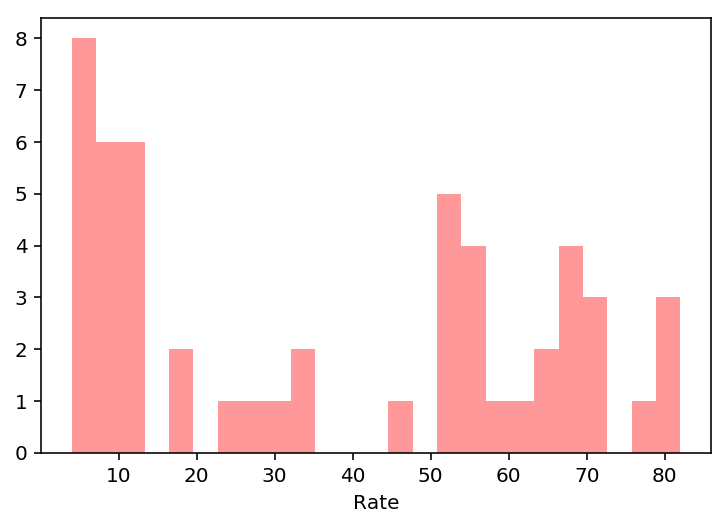

In [10]:
import seaborn as sns
sns.distplot(sat_df['Rate'],bins=25, kde=False, color='red')

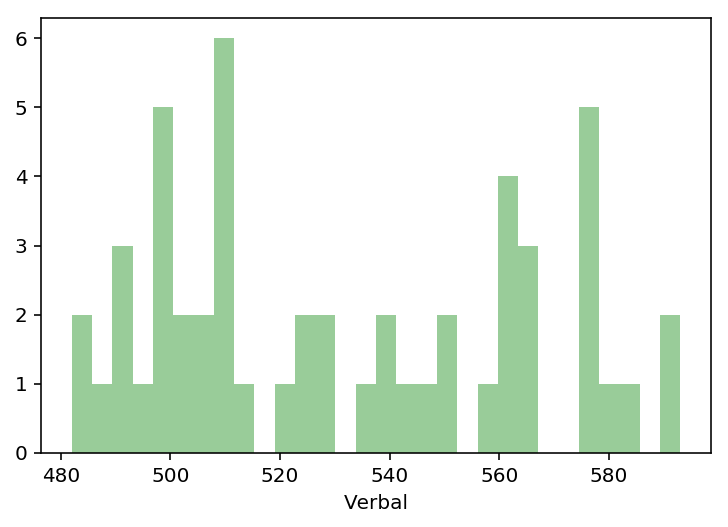

In [11]:
sns.distplot(sat_df['Verbal'],bins=30, kde=False, color ='green')

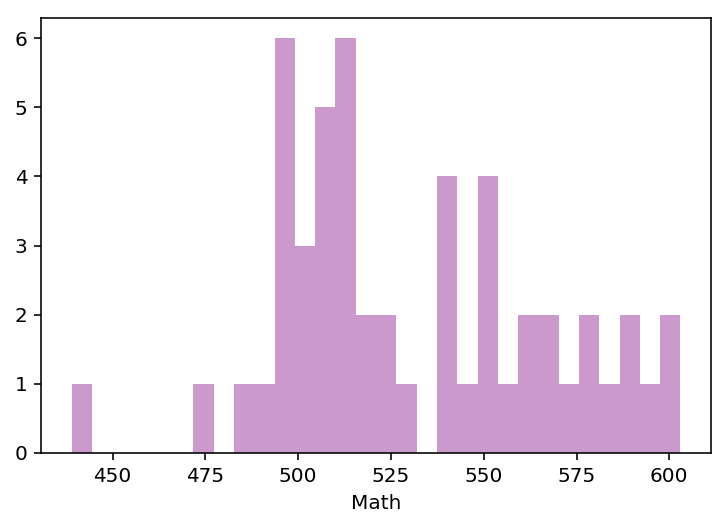

In [12]:
sns.distplot(sat_df['Math'],bins=30, kde=False, color='purple')

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

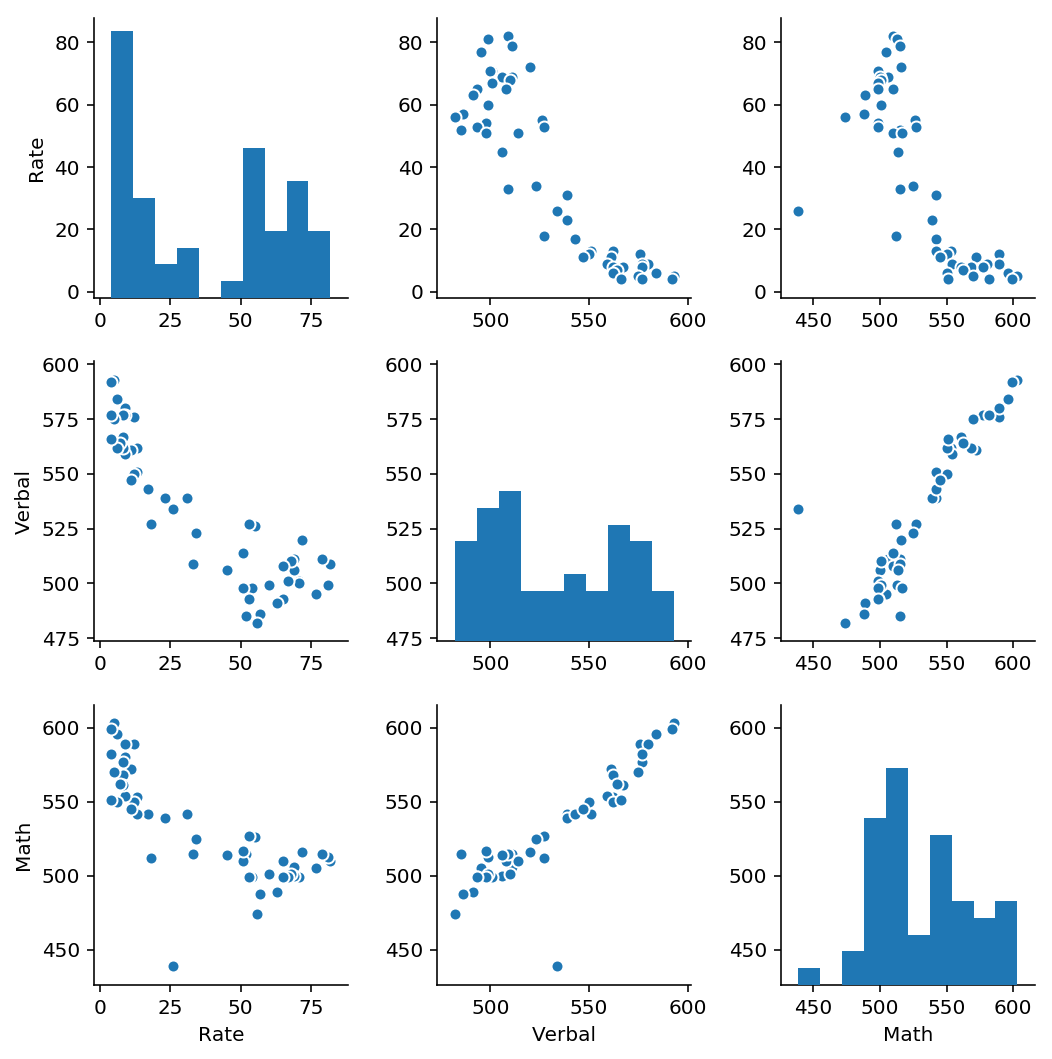

In [13]:
pairplot = sns.pairplot(sat_df)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

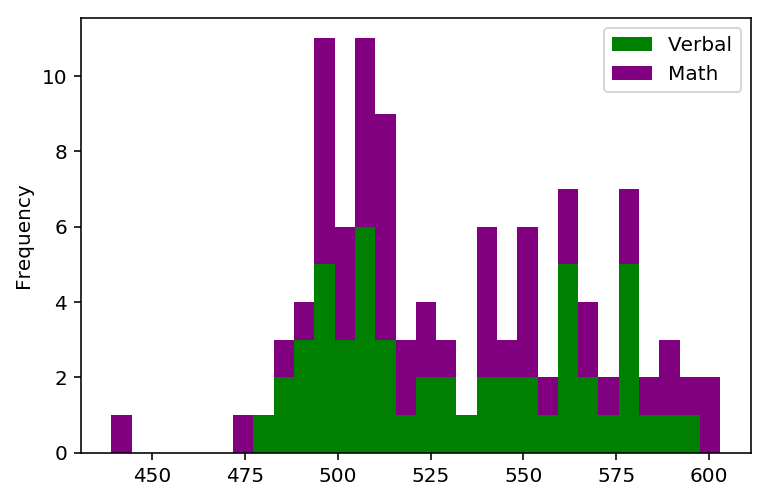

In [14]:
sat_df2v = pd.DataFrame(sat_df, columns=['Verbal', 'Math'])
sat_df2v.plot(kind='hist',bins=30, stacked=True, color=['green', 'purple'])

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

Text(0.5,1,u'Score of Verbal and Math Results')

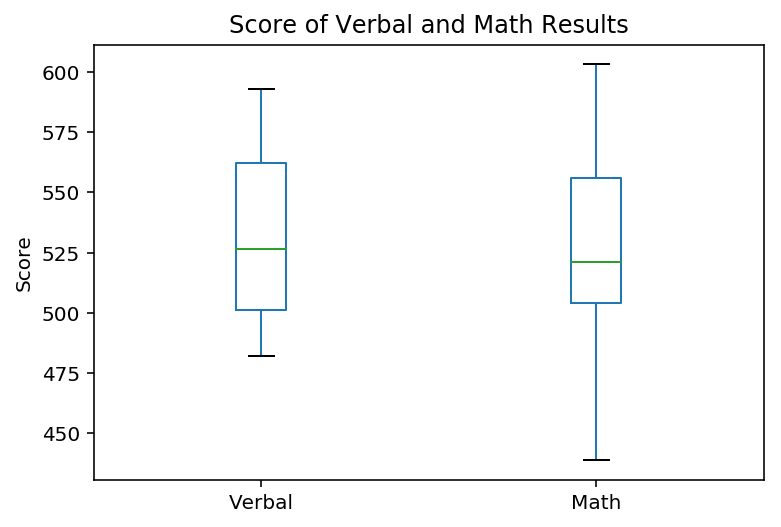

In [15]:
boxplot = sat_df2v.plot.box()

boxplot.set_ylabel('Score')
boxplot.set_title('Score of Verbal and Math Results')
#shows the value range of each dataset
#identifies the median and interquartile range
#shows outliers

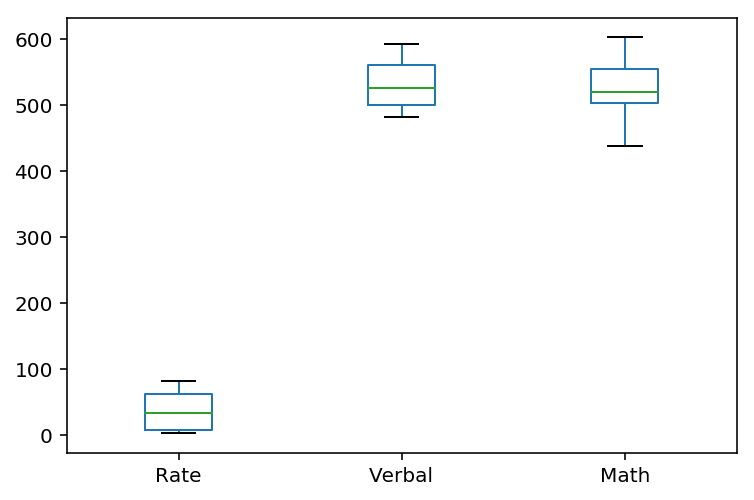

In [16]:
sat_df.plot.box()
# Graph will not be accurate because the scale of Rate's values is very different from the value scales of Verbal and Math

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


Text(0.5,1,u'Comparison of Rate, Verbal and Math Results')

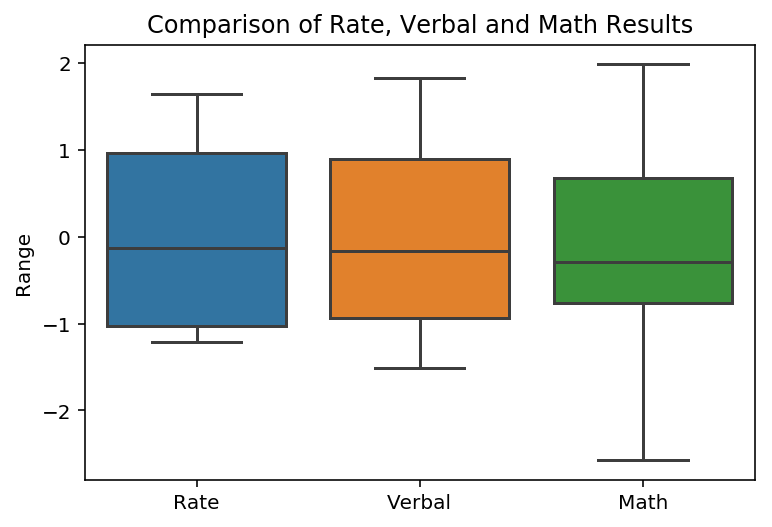

In [17]:
#standardized_variable = (variable - mean_of_variable) / std_dev_of_variable
sat_boxstand = pd.DataFrame(sat_df, columns=['Rate', 'Verbal', 'Math'])
sat_boxstand
sat_stand = (sat_boxstand - sat_boxstand.mean()) / sat_boxstand.std()
boxplot = sns.boxplot(data=sat_stand)
boxplot.set_ylabel('Range')
boxplot.set_title('Comparison of Rate, Verbal and Math Results')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [18]:
sat_avg = sat_df['Verbal'].mean()
print sat_avg
above_mean = sat_df[sat_df['Verbal'] > sat_avg]
print len(above_mean)
above_mean
# 24 states with Verbal scores above the average

532.019230769
24


,State,Rate,Verbal,Math
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550
35,WY,11,547,545
36,MI,11,561,572


In [19]:
sat_median = sat_df['Verbal'].median()
print sat_median

526.5


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [20]:
sat_median = sat_df['Verbal'].median()
print sat_median

above_median = sat_df[sat_df['Verbal'] > sat_median]
print len(above_median)
above_median

# 26 states with Verbal scores above the median
# 2 more states compared to the above mean list

526.5
26


,State,Rate,Verbal,Math
19,WA,53,527,527
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
29,WV,18,527,512
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [21]:
sat_df['Difference'] = sat_df.apply(lambda row: row['Verbal'] - row['Math'], axis=1)
sat_df.head()

,State,Rate,Verbal,Math,Difference
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [22]:
verbal_df = sat_df.sort_values(sat_df.columns[4], ascending=False)
verbal_df.head(3)

,State,Rate,Verbal,Math,Difference
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15


In [23]:
math_df = sat_df.sort_values(sat_df.columns[4])
math_df.head(3)

,State,Rate,Verbal,Math,Difference
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [24]:
sat_corr = sat_df.corr()
sat_corr

,Rate,Verbal,Math,Difference
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
Difference,-0.101412,0.052600,-0.388219,1.000000


In [25]:
sat_corr['Rate'].sort_values(ascending=False)
# Rate has a strong negative correlation to Verbal and Math

Rate          1.000000
Difference   -0.101412
Math         -0.773746
Verbal       -0.886432
Name: Rate, dtype: float64

In [26]:
sat_corr['Verbal'].sort_values(ascending=False)
# Verbal has a strong positive correlation to Math and a strong negative correlation to Rate

Verbal        1.000000
Math          0.899871
Difference    0.052600
Rate         -0.886432
Name: Verbal, dtype: float64

In [27]:
sat_corr['Math'].sort_values(ascending=False)
# Math has a strong positive correlation to Verbal and a strong negative correlation to Rate

Math          1.000000
Verbal        0.899871
Difference   -0.388219
Rate         -0.773746
Name: Math, dtype: float64

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [29]:
sat_df.describe()
# count = total number of entries for each column.
# mean = the average of the total values in each column.
# std = the standard deviation of the values in each column.
# min = the lowest value in each column.
# 25% = the 25th percentile of all the values in each column.
# 50% = the 50th percentile of all the values in each column.
# 75% = the 75th percentile of all the values in each column.
# max = the highest value in each column.

,Rate,Verbal,Math,Difference
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [30]:
sat_cov = sat_df.cov()
sat_cov

,Rate,Verbal,Math,Difference
Rate,745.387632,-804.355958,-760.803922,-43.552036
Verbal,-804.355958,1104.646682,1077.147059,27.499623
Math,-760.803922,1077.147059,1297.078431,-219.931373
Difference,-43.552036,27.499623,-219.931373,247.430995


In [31]:
sat_corr

,Rate,Verbal,Math,Difference
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
Difference,-0.101412,0.052600,-0.388219,1.000000


while both covariance matrix and correlation matrix share the positive and negative signs
in their values, the covariance values themselves are much larger than the correlation values.

CORR(x,y) = COV(x,y)/( xstd * ystd)

covariance measures how 2 variables change together, but does not consider individual 
variance, unlike correlation. Covariance can take on any value while correlation value is
between -1 and 1, which makes covariance difficult to interpret.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [32]:
drug_df = pd.read_csv('drug-use-by-age.csv')
drug_df.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [33]:
drug_df.info()
# missing values('-') in 6 columns
#'cocaine-frequency', crack-frequency, heroin-frequency, inhalant-frequency, oxycontin-frequency, meth-frequency

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [34]:
drug_df['crack-frequency']

0        -
1      3.0
2        -
3      9.5
4      1.0
5     21.0
6     10.0
7      2.0
8      5.0
9     17.0
10     5.0
11     6.0
12     6.0
13    15.0
14    48.0
15    62.0
16       -
Name: crack-frequency, dtype: object

In [35]:
drug_df = drug_df.apply(lambda x: x.replace('-', np.nan))
drug_df['cocaine-frequency'] = drug_df['cocaine-frequency'].astype(float)
drug_df['crack-frequency'] = drug_df['crack-frequency'].astype(float)
drug_df['heroin-frequency'] = drug_df['heroin-frequency'].astype(float)
drug_df['inhalant-frequency'] = drug_df['inhalant-frequency'].astype(float)
drug_df['oxycontin-frequency'] = drug_df['oxycontin-frequency'].astype(float)
drug_df['meth-frequency'] = drug_df['meth-frequency'].astype(float)

drug_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          16 non-null float64
crack-use                  17 non-null float64
crack-frequency            14 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           16 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         16 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

Text(0.5,1,u'Number of users across different age range')

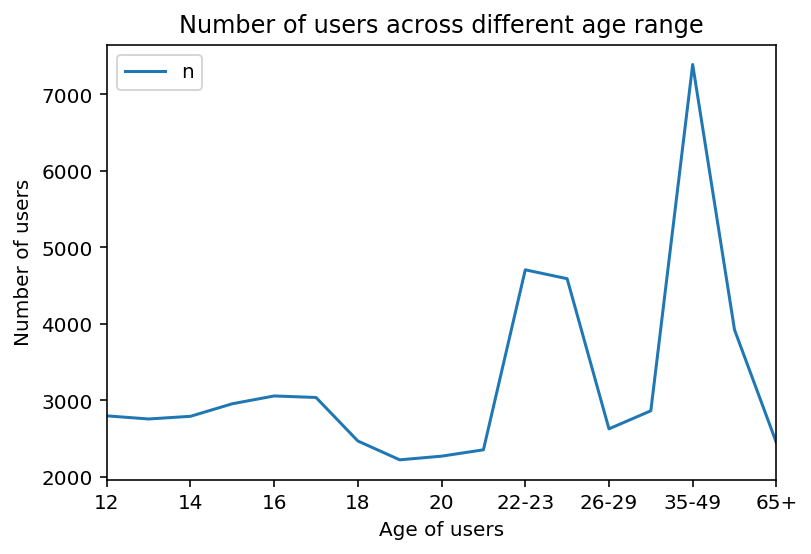

In [36]:
#show total number of all drug users for each age group

age_user_plot = drug_df.plot(x='age', y='n', kind='line')
age_user_plot.set_xlabel('Age of users')
age_user_plot.set_ylabel('Number of users')
age_user_plot.set_title('Number of users across different age range')

In [37]:
#slice all drug frequency columns
#median number of times used by a user in the past 12 months

drug_freq_df = drug_df.iloc[:, 3:28:2]
drug_freq_df.head()

,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency
0,3.0,4.0,5.0,NaN,35.5,52.0,19.0,36.0,24.5,52.0,2.0,NaN,13.0
1,6.0,15.0,1.0,3.0,NaN,6.0,12.0,14.0,41.0,25.5,4.0,5.0,19.0
2,5.0,24.0,5.5,NaN,2.0,3.0,5.0,12.0,4.5,5.0,12.0,24.0,16.5
3,6.0,25.0,4.0,9.5,1.0,4.0,5.5,10.0,3.0,4.5,6.0,10.5,30.0
4,10.0,30.0,7.0,1.0,66.5,3.0,3.0,7.0,4.0,11.0,9.5,36.0,3.0


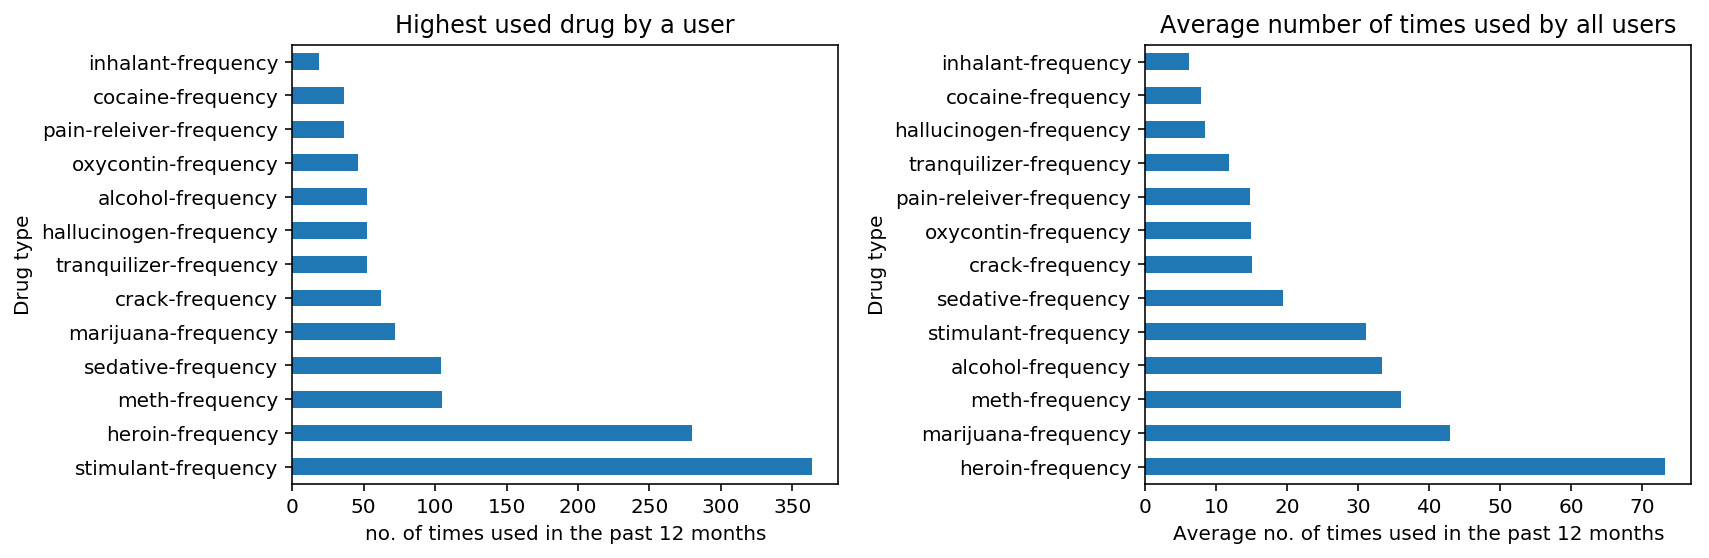

In [38]:
# compare highest number of times used by a user VS average number of times used by all users

plt.subplot(1, 2, 1)
graph = drug_freq_df.max().sort_values(ascending=False)
graph.plot(kind='barh', figsize=(12,4))
plt.xlabel('no. of times used in the past 12 months')
plt.ylabel('Drug type')
plt.title('Highest used drug by a user')

plt.subplot(1, 2, 2)
graph2 = drug_freq_df.mean().sort_values(ascending=False)
graph2.plot(kind='barh', figsize=(12,4))
plt.xlabel('Average no. of times used in the past 12 months')
plt.ylabel('Drug type')
plt.title('Average number of times used by all users')

plt.tight_layout()
plt.show()

Text(0.5,1,u'Number of users for all drugs across all age groups')

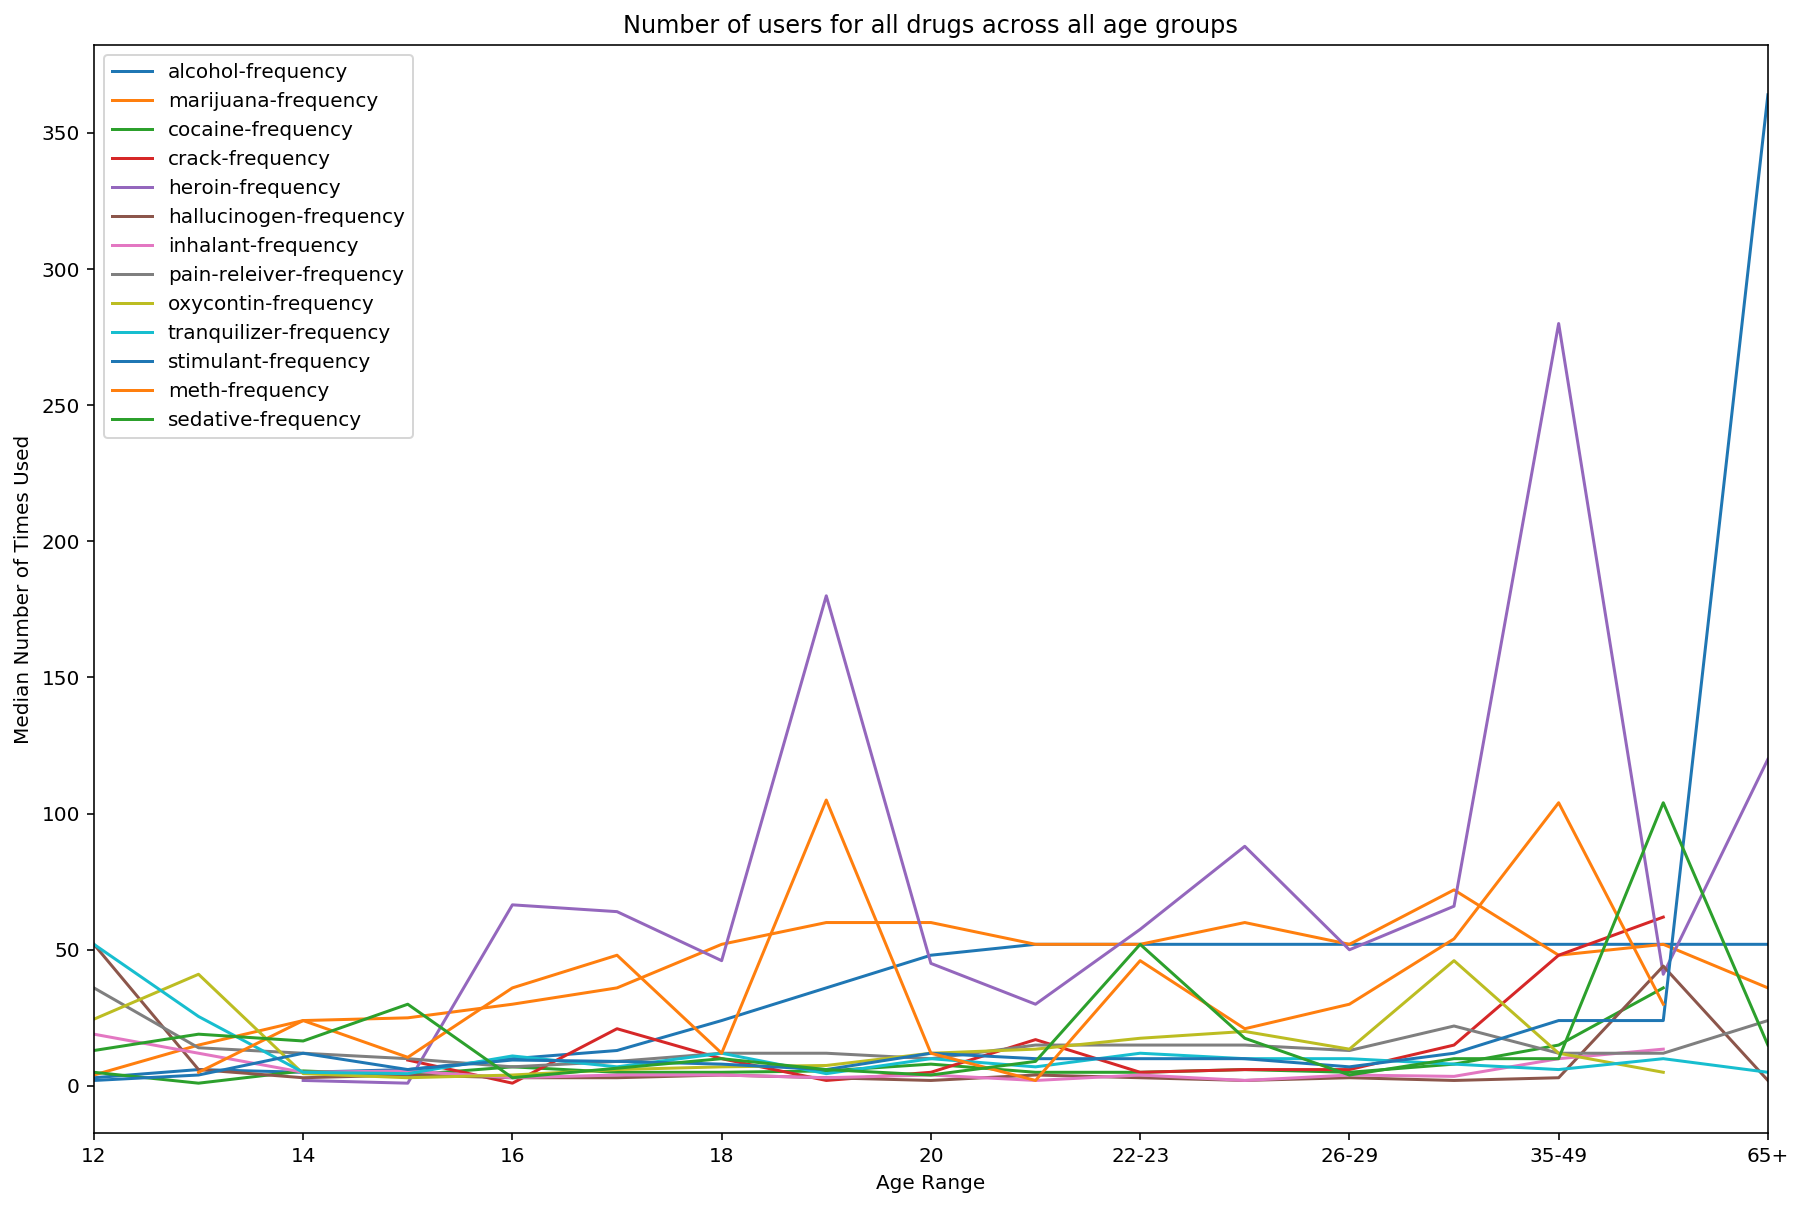

In [39]:
#number of users for all drugs across all age groups

graph3 = drug_freq_df
graph3 = pd.concat([graph3, drug_df['age']], axis=1)
graph3.plot(x='age', kind='line', figsize=(15,10))
plt.xlabel('Age Range')
plt.ylabel('Median Number of Times Used')
plt.title('Number of users for all drugs across all age groups')

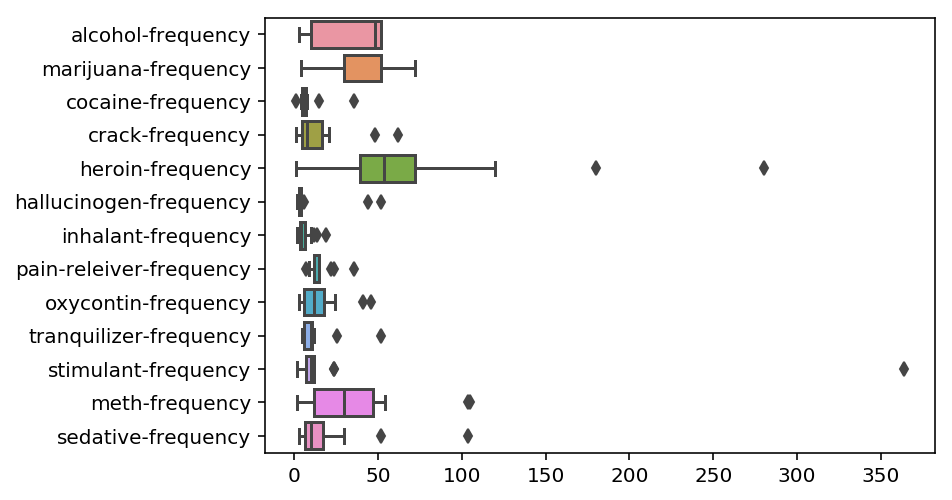

In [40]:
#identify outliers for all drug frequencies

drug_freq_box = sns.boxplot(data=drug_freq_df, orient='h')

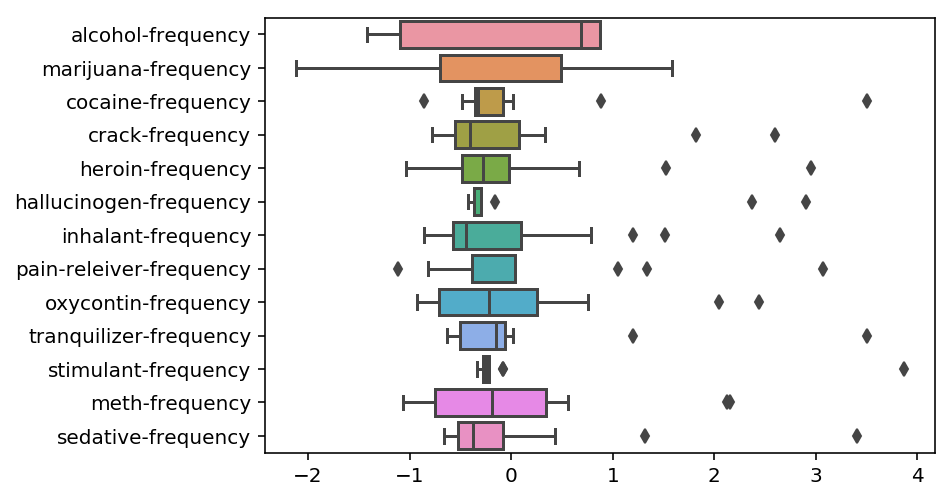

In [41]:
#identify outliers with normalized scale for all drug frequencies

drug_freq = (drug_freq_df - drug_freq_df.mean()) / drug_freq_df.std()
drug_freq_box = sns.boxplot(data=drug_freq, orient='h')

In [42]:
#slice all drug use columns
#percentage of those in an age group that used in the past 12 months

drug_use_df = drug_df.iloc[:, 2:27:2]
drug_use_df.head()

,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
0,3.9,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2
1,8.5,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1
2,18.1,8.7,0.1,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2
3,29.2,14.5,0.5,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4
4,40.1,22.5,1.0,0.0,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2


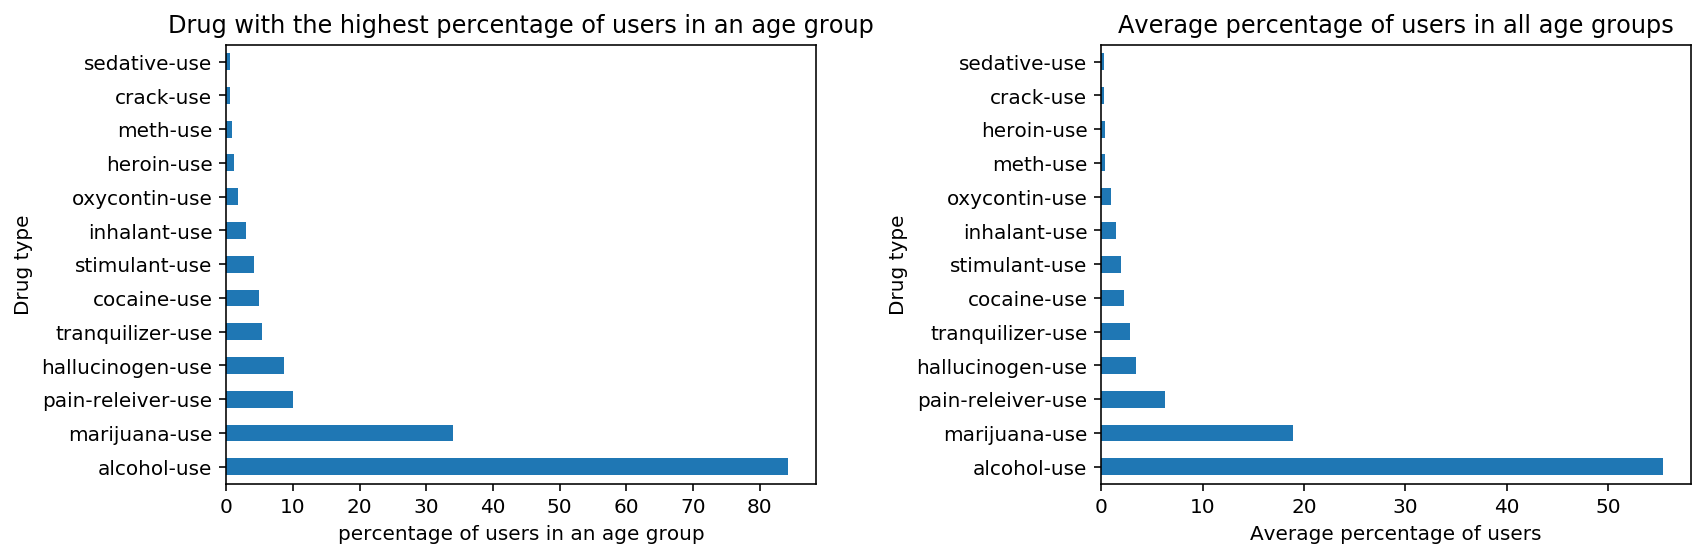

In [43]:
# compare which drug has the highest percentage of users in an age group VS average percentage
# of users in all age groups

plt.subplot(1, 2, 1)
graph4 = drug_use_df.max().sort_values(ascending=False)
graph4.plot(kind='barh', figsize=(12,4))
plt.xlabel('percentage of users in an age group')
plt.ylabel('Drug type')
plt.title('Drug with the highest percentage of users in an age group')

plt.subplot(1, 2, 2)
graph5 = drug_use_df.mean().sort_values(ascending=False)
graph5.plot(kind='barh', figsize=(12,4))
plt.xlabel('Average percentage of users')
plt.ylabel('Drug type')
plt.title('Average percentage of users in all age groups')

plt.tight_layout()
plt.show()

Text(0.5,1,u'Percentage of users for all drugs across all age groups')

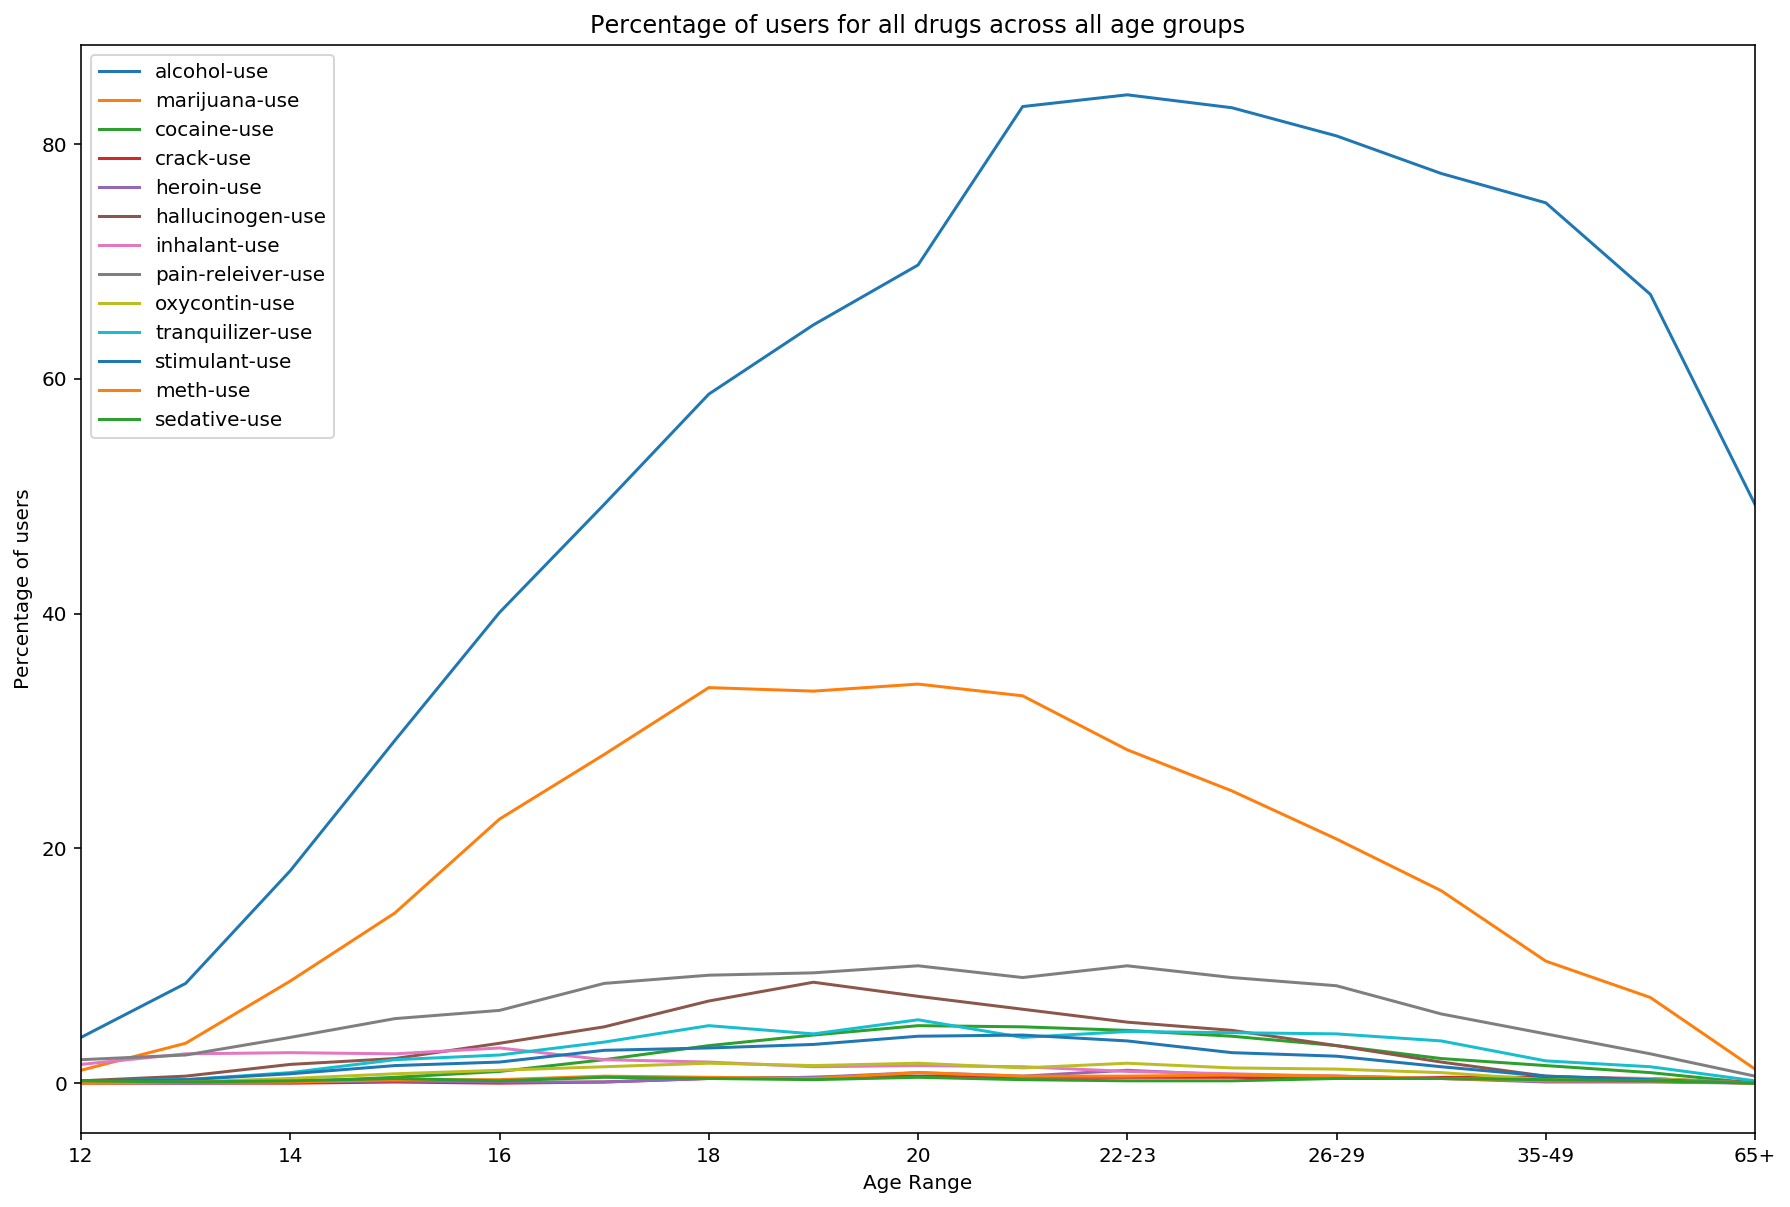

In [44]:
# percentage of users for all drugs across all age groups

graph6 = drug_use_df
graph6 = pd.concat([graph6, drug_df['age']], axis=1)

graph6.plot(x='age', kind='line', figsize=(15,10))
plt.xlabel('Age Range')
plt.ylabel('Percentage of users')
plt.title('Percentage of users for all drugs across all age groups')

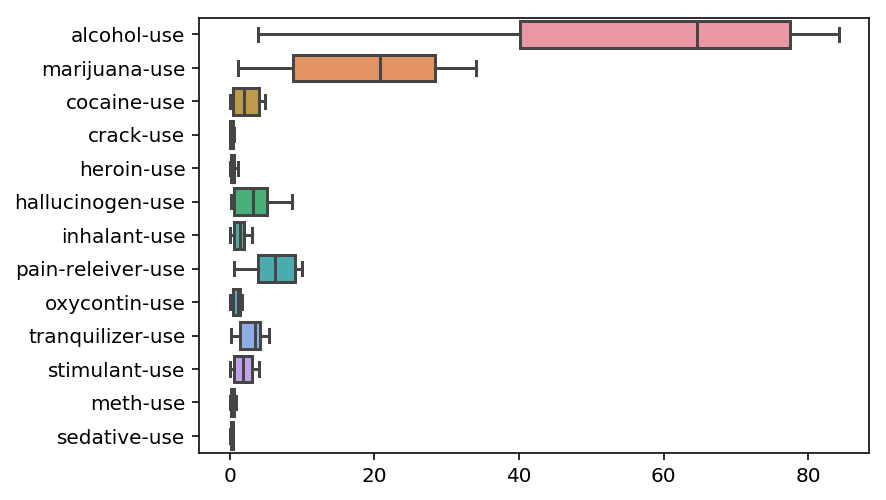

In [45]:
#identify outliers for all drug use

drug_use_box = sns.boxplot(data=drug_use_df, orient='h')

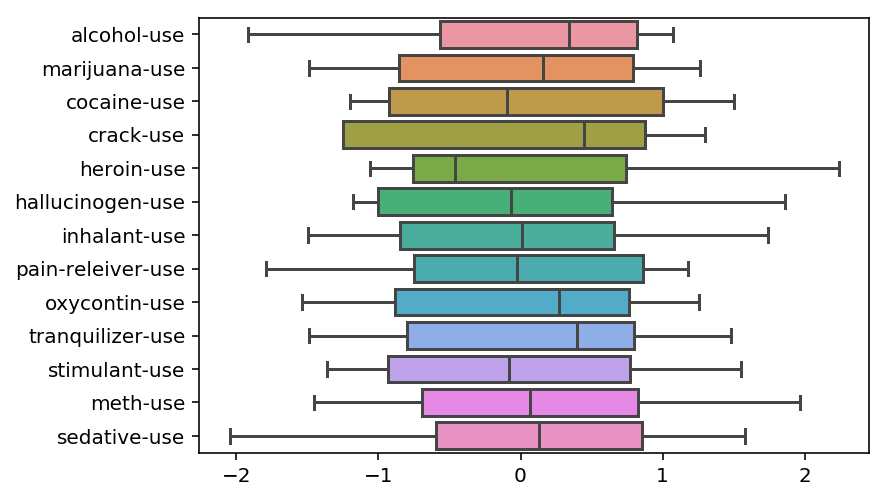

In [46]:
#identify outliers with normalized scale for all drug use

drug_use = (drug_use_df - drug_use_df.mean()) / drug_use_df.std()
drug_use_box2 = sns.boxplot(data=drug_use, orient='h')

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**

The goal will be to test the significance of the correlation coefficient between the percentage of alcohol users and number of times alcohol was used within 12 months.

The hypothesis will therefore be the following:

H0 - The population correlation coefficient is equals to 0

H1 - The population correlation coefficient is not equals to 0 (two-tailed)

Deliverables:
State the null and alternate hypothesis
Identify the correlation coefficient of the sample
Establish the level of significance
Calculate the t-statistic
State the critical value
Conclude on the hypothesis
...

In [47]:
# Code
alcohol = drug_df.iloc[:, 2:4]
print alcohol.count()
alcohol.head()

alcohol-use          17
alcohol-frequency    17
dtype: int64


,alcohol-use,alcohol-frequency
0,3.9,3.0
1,8.5,6.0
2,18.1,5.0
3,29.2,6.0
4,40.1,10.0


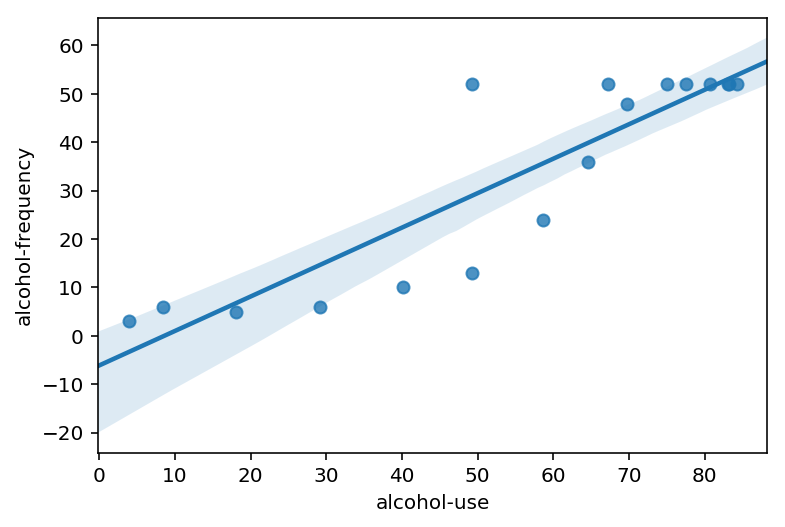

In [48]:
sns.regplot(alcohol['alcohol-use'], alcohol['alcohol-frequency'], data=alcohol)

In [49]:
alcohol_corr = alcohol.corr()
print alcohol_corr
r = alcohol_corr.iloc[0,1]
r

                   alcohol-use  alcohol-frequency
alcohol-use           1.000000           0.897889
alcohol-frequency     0.897889           1.000000


0.89788929382394012

In [50]:
# calculate t-statistic
# formula for t = (r * sqrt(n-2)) / (sqrt(1-r**2))

n = len(alcohol)
print 'n number of samples: ' + str(n)
print 'r correlation coefficient: ' + str(r)
t = (r * np.sqrt(n-2)) / (np.sqrt(1-r**2))
print 't-statistic: ' + str(t)

n number of samples: 17
r correlation coefficient: 0.897889293824
t-statistic: 7.8994589194


In [79]:
# significance level = 0.05 (two tailed -0.025, 0.025)
# using the t-distribution table, identify the critical value
# calculate df degree of freedom

df = n-1
print 'df degree of freedom: ' + str(df)
cv = 2.12
print 'cv critical value: ' + str(cv)
print 't-statistic: ' + str(t)

df degree of freedom: 16
cv critical value: 2.12
t-statistic: 7.8994589194


In [84]:
stats.ttest_rel(alcohol['alcohol-use'], alcohol['alcohol-frequency'])

Ttest_relResult(statistic=7.4836590773846181, pvalue=1.3033212453075805e-06)

**Report**

Given that the t-statistic value is higher than the critical value, we therefore reject the null hypothesis at the 5% significance level.

Thus we infer that the population correlation coefficient is significantly different from 0.

...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [60]:
sat_rate = sat_df[['Rate']]
sat_rate.describe()

,Rate
count,52.000000
mean,37.153846
std,27.301788
min,4.000000
25%,9.000000
50%,33.500000
75%,63.500000
max,82.000000


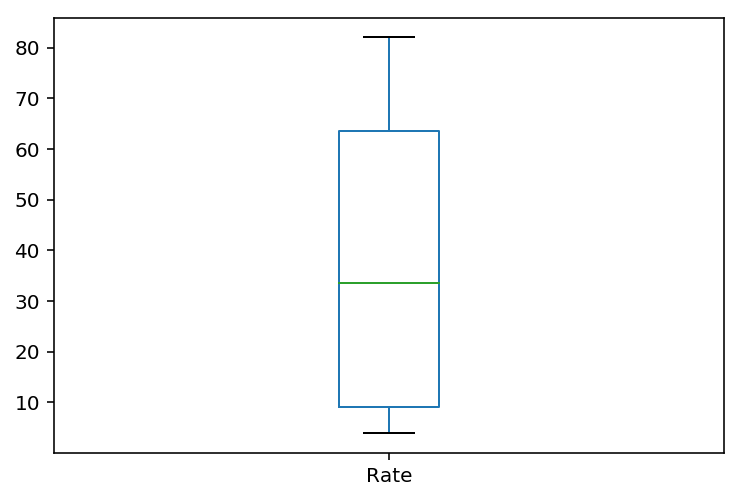

In [61]:
sat_rate.plot.box()

In [62]:
# definition of outliers = values that fall more than 1.5 times the interquartile range above
# the third quartile or below the first quartile

q3 = np.percentile(sat_rate, 75)
q1 = np.percentile(sat_rate, 25)
print q1, q3
IQR = q3 - q1
print IQR
low = q1 - 1.5*IQR
high = q3 + 1.5*IQR
print low, high
sat_outlier = sat_rate[(sat_rate < low) | (sat_rate > high)]
sat_outlier.count()

# no outliers found in Rate.

9.0 63.5
54.5
-72.75 145.25


Rate    0
dtype: int64

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [63]:
sat_spear = sat_df.corr(method='spearman')
sat_spear

,Rate,Verbal,Math,Difference
Rate,1.000000,-0.833294,-0.813275,-0.014266
Verbal,-0.833294,1.000000,0.905205,0.060244
Math,-0.813275,0.905205,1.000000,-0.239883
Difference,-0.014266,0.060244,-0.239883,1.000000


In [64]:
sat_corr

,Rate,Verbal,Math,Difference
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
Difference,-0.101412,0.052600,-0.388219,1.000000


In [65]:
sat_rate = pd.concat([sat_spear['Rate'], sat_corr['Rate']], axis=1)
col_name = ['Spearman', 'Pearson']
sat_rate.columns = col_name
sat_rate

#Both Spearman and Pearson show a strong negative correlation between Rate to Verbal and Math,
#and a weak negative correlation to Difference

,Spearman,Pearson
Rate,1.000000,1.000000
Verbal,-0.833294,-0.886432
Math,-0.813275,-0.773746
Difference,-0.014266,-0.101412


In [66]:
sat_verbal = pd.concat([sat_spear['Verbal'], sat_corr['Verbal']], axis=1)
sat_verbal.columns = col_name
sat_verbal

#Both Spearman and Pearson show a strong negative correlation to Rate a strong positive 
#correlation to Math, and a weak positive correlation to Difference

,Spearman,Pearson
Rate,-0.833294,-0.886432
Verbal,1.000000,1.000000
Math,0.905205,0.899871
Difference,0.060244,0.052600


In [67]:
sat_math = pd.concat([sat_spear['Math'], sat_corr['Math']], axis=1)
sat_math.columns = col_name
sat_math

#Both Spearman and Pearson show a strong negative correlation to Rate, a strong positive 
#correlation to Verbal, and a weak negative correlation to Difference

,Spearman,Pearson
Rate,-0.813275,-0.773746
Verbal,0.905205,0.899871
Math,1.000000,1.000000
Difference,-0.239883,-0.388219


In [68]:
sat_diff = pd.concat([sat_spear['Difference'], sat_corr['Difference']], axis=1)
sat_diff.columns = col_name
sat_diff

#Both Spearman and Pearson show a weak negative correlation to Rate and Math, and a weak
#positive correlation to Verbal

,Spearman,Pearson
Rate,-0.014266,-0.101412
Verbal,0.060244,0.052600
Math,-0.239883,-0.388219
Difference,1.000000,1.000000


In [69]:
# Create a table with 6 columns [Data 1, Data 2, Rank 1, Rank 2, d, d**2].
# Fill in the Data 1 and Data 2 columns with data from the 2 variables.
# In the 3rd column Rank 1, rank the data from the first column from 1 to n number of data points
# Give the lowest value a rank of 1, the next lowest a rank of 2, and so on.
# Repeat the ranking process for the next column Rank 2, using the values from column Data 2.
# In column d, calculate the difference between the values in rank 1 and rank 2.
# Square each new value in column d and place the squared values in column d**2
# Sum up all the values of d**2.
# Identify the value of n.
# Calculate the spearman rank correlation using the formula:
# 1 - (6 * sum(d**2))/(n**3 - n)

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [70]:
sat_df['Rate']
sat_df['Percentile'] = [stats.percentileofscore(sat_df['Rate'], x, 'rank') for x in sat_df['Rate']]
sat_df.head(10)

,State,Rate,Verbal,Math,Difference,Percentile
0,CT,82,509,510,-1,100.000000
1,NJ,81,499,513,-14,98.076923
2,MA,79,511,515,-4,96.153846
3,NY,77,495,505,-10,94.230769
4,NH,72,520,516,4,92.307692
5,RI,71,501,499,2,89.423077
6,PA,71,500,499,1,89.423077
7,VT,69,511,506,5,85.576923
8,ME,69,506,500,6,85.576923
9,VA,68,510,501,9,82.692308


In [71]:
print sat_df[sat_df['State'] == 'CA']

   State  Rate  Verbal  Math  Difference  Percentile
23    CA    51     498   517         -19   56.730769


In [72]:
# Percentile scoring involves ranking the values based on their position on the percentage scale,
# which is similar to the ranking in spearman rank correlation.

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

In [73]:
drug_df.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [74]:
stimulant = drug_df[['age', 'n', 'stimulant-frequency']]

In [75]:
stimulant['stimulant-frequency']
stimulant['Percentile'] = [stats.percentileofscore(stimulant['stimulant-frequency'], x, 'rank') 
                           for x in stimulant['stimulant-frequency']]
stimulant

/Users/darylcheong/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,age,n,stimulant-frequency,Percentile
0,12,2798,2.0,5.882353
1,13,2757,4.0,11.764706
2,14,2792,12.0,76.470588
3,15,2956,6.0,20.588235
4,16,3058,9.5,47.058824
5,17,3038,9.0,41.176471
6,18,2469,8.0,35.294118
7,19,2223,6.0,20.588235
8,20,2271,12.0,76.470588
9,21,2354,10.0,58.823529


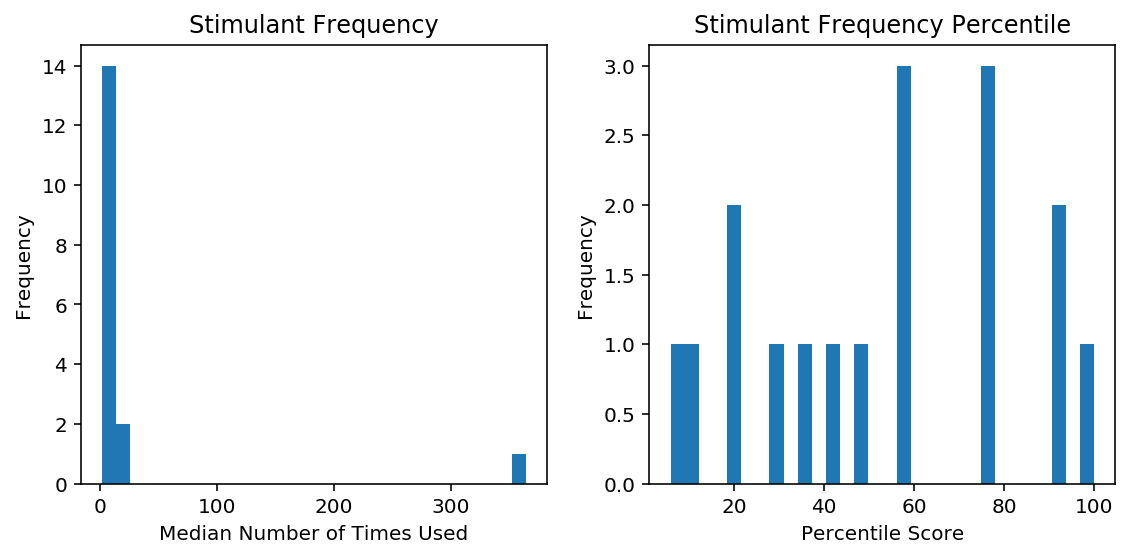

In [76]:
plt.subplot(1, 2, 1)
stimulant['stimulant-frequency'].plot(kind='hist', bins=30, figsize=(8, 4))
plt.title('Stimulant Frequency')
plt.xlabel('Median Number of Times Used')
plt.subplot(1, 2, 2)
stimulant['Percentile'].plot(kind='hist', bins=30, figsize=(8, 4))
plt.title('Stimulant Frequency Percentile')
plt.xlabel('Percentile Score')
plt.tight_layout()
plt.show()

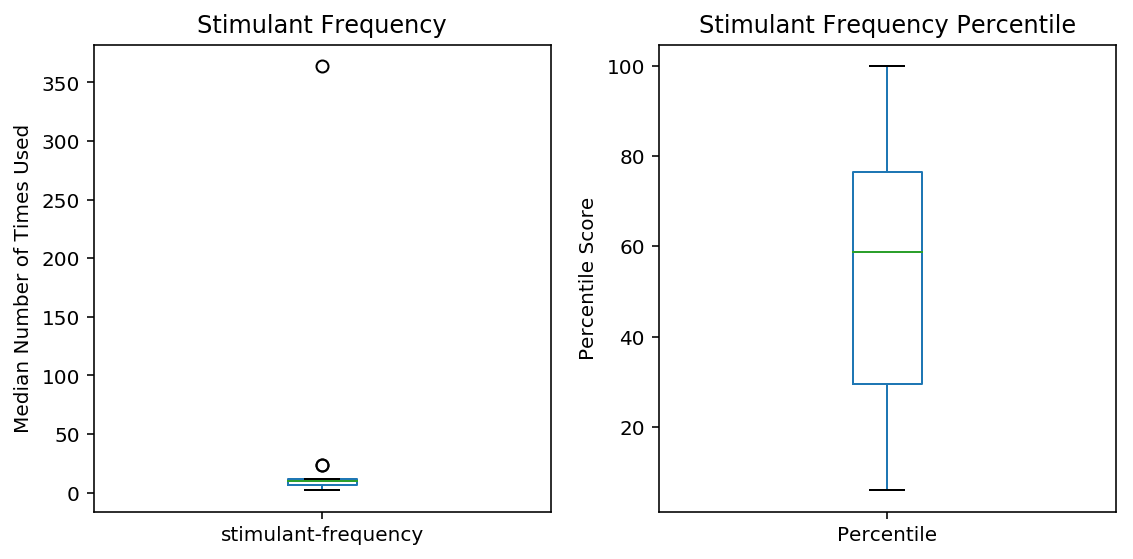

In [77]:
plt.subplot(1, 2, 1)
stimulant['stimulant-frequency'].plot.box(figsize=(8, 4))
plt.title('Stimulant Frequency')
plt.ylabel('Median Number of Times Used')
plt.subplot(1, 2, 2)
stimulant['Percentile'].plot.box(figsize=(8, 4))
plt.title('Stimulant Frequency Percentile')
plt.ylabel('Percentile Score')
plt.tight_layout()
plt.show()